# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
print(hospital_read_df.head(2))

                          Hospital Name  Provider Number State  \
0  FROEDTERT MEMORIAL LUTHERAN HOSPITAL           520177    WI   
1                   PROVIDENCE HOSPITAL            90006    DC   

             Measure Name Number of Discharges  Footnote  \
0  READM-30-HIP-KNEE-HRRP                  242       NaN   
1  READM-30-HIP-KNEE-HRRP                  247       NaN   

   Excess Readmission Ratio  Predicted Readmission Rate  \
0                    1.9095                        10.8   
1                    1.7521                         9.2   

   Expected Readmission Rate  Number of Readmissions  Start Date    End Date  
0                        5.6                    38.0  07/01/2010  06/30/2013  
1                        5.3                    33.0  07/01/2010  06/30/2013  


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)

clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

row_count = len(clean_hospital_read_df.index) 
#for i in range(row_count):
#    print(i,clean_hospital_read_df['Number of Discharges'][i])
#print(clean_hospital_read_df['Number of Discharges'][62])
#clean_hospital_read_df.to_csv('tmp.csv')
    


C:\Users\weichun\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


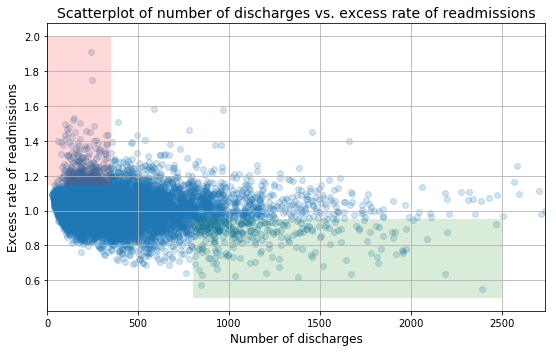

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## A. Do you agree with the above analysis and recommendations? Why or why not?


It is not so obvious to conclude the rate of readmissions is trending down with increasing number of discharges by looking at the scatter plot. The plot does not show a very clear decreasing trend. We should probably do a regression analysis to find such a trend.

In [27]:
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()
print(len(x))
print(len(y))

xa=np.asarray(x)
ya=np.asarray(y)

# Train the model using the training sets
#regr.fit(xa, ya)
regr.fit(xa.reshape(-1,1), ya.reshape(-1,1))


11494
11494


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Coefficients: 
 [[ -2.85650529e-05]]
Mean squared error: 0.01
Variance score: 0.01


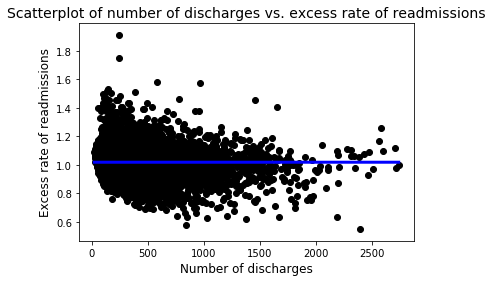

In [31]:
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

x=np.asarray(x)
y=np.asarray(y)

x=x.reshape(-1,1)
y=y.reshape(-1,1)

# Train the model using the training sets
regr.fit(x, y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(y), color='blue',
         linewidth=3)
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
#fig, ax = plt.subplots(figsize=(8,5))
#ax.scatter(x, y,alpha=0.2)

Although the coefficient is negative, the value is very small. We cannot say for sure if this trend is significant or not.


Hypotheses Testing

Null Hypothesis: The average excess readmission ratio is the same for hospitals with more than 1000 discharges, less than 100 discharges,  and all other hospitals.

Alternative Hypothesis: There are differences in the average excess readmission ratio among the groups of hospital discharges.

H0:μ>1000=μ<100=μothers 
HA: The average excess readmission ratio varies across some (or all) groups.

Comparisons must be made using ANOVA. The groups to be considered are hospitals with fewer than 100 discharges, hospitals with more than 1000 discharges, and all others.

The advantage to use a scatter plot is it is easy to understand/interpret. The disadvantage is when data is large, it is difficult to find the trend.

In [51]:
# creating dataframes for each of the groups
df = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'].notnull())]
low = df[(df['Number of Discharges'] < 100)]
high = df[(df['Number of Discharges'] > 1000)]
mid = df[(df['Number of Discharges'] < 1000) & (df['Number of Discharges'] > 100)]
low_data = sorted(low['Excess Readmission Ratio'])
high_data = sorted(high['Excess Readmission Ratio'])
mid_data = sorted(mid['Excess Readmission Ratio'])
mu_low = np.average(lowd)

print(type(low_data))

<class 'list'>


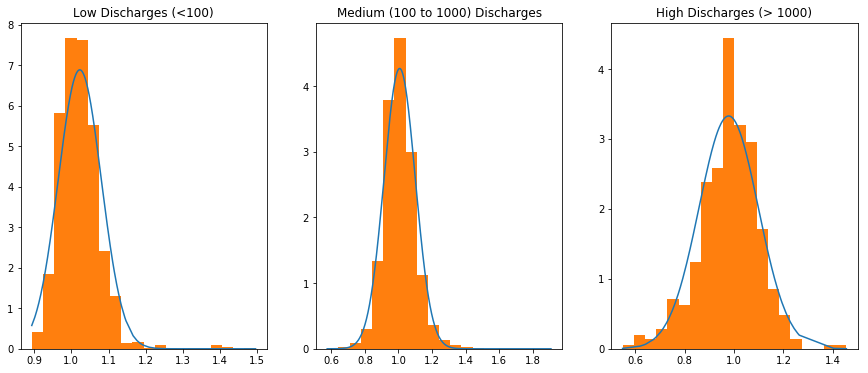

In [54]:
#Plotting to check normality for each subpopulation
import scipy.stats as stats

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(1,3,1)
mu_low = np.average(low_data)
sigma_low = np.std(low_data)
fit = stats.norm.pdf(low_data, mu_low, sigma_low)
ax1.plot(low_data, fit)
ax1.hist(low_data, 20, normed=True)
ax1.set_title("Low Discharges (<100)")

ax2 = fig.add_subplot(1,3,2)
mu_mid = np.average(mid_data)
sigma_mid = np.std(mid_data)
fit = stats.norm.pdf(mid_data, mu_mid, sigma_mid)
ax2.plot(mid_data, fit)
ax2.hist(mid_data, 20, normed=True)
ax2.set_title("Medium (100 to 1000) Discharges")

ax3 = fig.add_subplot(1,3,3)
mu_high = np.average(high_data)
sigma_high= np.std(high_data)
fit = stats.norm.pdf(high_data, mu_high, sigma_high)
ax3.plot(high_data, fit)
ax3.hist(high_data, 20, normed=True)
ax3.set_title("High Discharges (> 1000)")

In [47]:
f_statistic, p_value = stats.f_oneway(lowd, highd, midd)
print ('f value : ', f_statistic)
print ('p value : ', p_value)

f value :  39.6402382815
p value :  6.9782900901e-18


The p-value is very very small. Therefore we can reject the null hypothesis which is the average excess readmission ratio is the same for hospitals with more than 1000 discharges, less than 100 discharges, and discharges between 100 and 1000. Hence, there is a significant difference which cannot be attributed to random chances. We probably need to do some other analyses to find what might influence excess readmissions.